# Decision Trees in Python

### Import Libraries

In [1]:
import pandas as pd

### Get The Data. Load data "spambase_data.csv"

In [2]:
df = pd.read_csv('spambase_data.csv',header = None)
df.head() # used to display top 5 rows

0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]

### Train and Test Split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df[df.columns[:-1]]
Y = df[len(df.columns)-1]

#### Obtain X_train, X_test, Y_train, Y_test by splitting the dataset into 70-30 ratio with a random state value 30.

Note: random_state is used to control the shuffling in the split of the dataset.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)

### Decision Trees

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

### Prediction and Evaluation

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn import tree

In [9]:
predictions = dtree.predict(X_test)

In [10]:
print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       863
           1       0.90      0.89      0.89       518

    accuracy                           0.92      1381
   macro avg       0.92      0.91      0.92      1381
weighted avg       0.92      0.92      0.92      1381

Confusion Matrix
[[814  49]
 [ 59 459]]

 Accuracy
0.9217958001448225


### Tree Visualization 

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16), dpi=1024)
tree.plot_tree(dtree)
fig.savefig('decision_tree.png')

#### Q1: Create a decision stump and find the majority class in the dataset

[Text(167.4, 163.07999999999998, 'X[51] <= 0.083\ngini = 0.481\nsamples = 3220\nvalue = [1925, 1295]'),
 Text(83.7, 54.360000000000014, 'gini = 0.263\nsamples = 1833\nvalue = [1548, 285]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.396\nsamples = 1387\nvalue = [377, 1010]')]

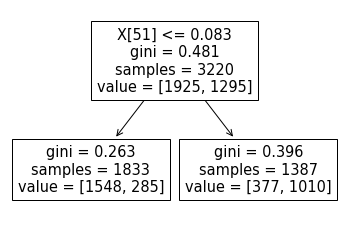

In [19]:
#### Code here ####
dtree0=DecisionTreeClassifier(max_depth=1,random_state=30)
dtree0.fit(X_train,Y_train)

tree.plot_tree(dtree0)


[Text(167.4, 163.07999999999998, 'X[51] <= 0.083\ngini = 0.481\nsamples = 3220\nvalue = [1925, 1295]'),
 Text(83.7, 54.360000000000014, 'gini = 0.263\nsamples = 1833\nvalue = [1548, 285]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.396\nsamples = 1387\nvalue = [377, 1010]')]

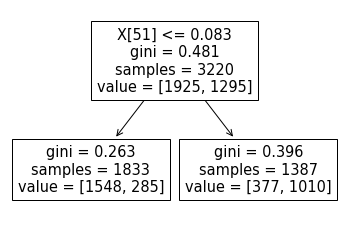

In [20]:
#### Majority class ####
tree.plot_tree(dtree0)

#### Q2: Implement the decision tree classifier using entropy to measure the quality of split and random state value as 30. 
Note: The features are always randomly permuted at each split, the best found split may vary across different runs. To obtain a deterministic behaviour during fitting, random state has to be fixed to an integer.

In [21]:
#### Code here ####
dtree1=DecisionTreeClassifier(criterion="entropy",random_state=30)
dtree1.fit(X_train,Y_train)
predictions1 = dtree1.predict(X_test)
print("Accuracy:"+str(accuracy_score(Y_test,predictions1)))
print("Precision:"+str(precision_score(Y_test,predictions1)))


Accuracy:0.9102099927588704
Precision:0.9004065040650406


#### Q3: Compare the two trees on the basis of their accuracy. Which tree gives better accuarcy (using gini index or entropy).

In [22]:
#### Write your answer here ####
print("Accuracy Score on entropy :"+ str(accuracy_score(Y_test,predictions1)))
print("Accuracy Score on gini :"+ str(accuracy_score(Y_test,predictions)))
if(accuracy_score(Y_test,predictions1)>accuracy_score(Y_test,predictions)):
    print("Entropy criterion gives better accuracy here")
else:
    print("gini criterion gives better accuracy here")

Accuracy Score on entropy :0.9102099927588704
Accuracy Score on gini :0.9217958001448225
gini criterion gives better accuracy here


#### Q4: Fully grown decision trees models usually overfits the data. To overcome the problem of overfitting, pruning techniques are used. One of which is restricting the height of the tree. Find the value of the height for which the decision tree model is giving the highest accuracy. (Use entropy measure)

In [23]:
#### Code here ####
maxd=dtree.get_depth()
#print(maxd)
res=0
resi=1
for i in range(1,maxd+1):
    dtree2=DecisionTreeClassifier(criterion="entropy",random_state=30,max_depth=i)
    dtree2.fit(X_train,Y_train)
    predictions2 = dtree2.predict(X_test)
    #print(dtree2)
    #print(i,accuracy_score(Y_test,predictions2))
    if(accuracy_score(Y_test,predictions2)>res):
        res=accuracy_score(Y_test,predictions2)
        resi=i
print("Height for best accuracy:"+str(resi))
print("Accuracy:"+str(res))
dtree2=DecisionTreeClassifier(criterion="entropy",random_state=30,max_depth=resi)
dtree2.fit(X_train,Y_train)
predictions2 = dtree2.predict(X_test)
print("Precision:"+str(precision_score(Y_test,predictions2)))


Height for best accuracy:18
Accuracy:0.9152787834902245
Precision:0.9050505050505051


#### Q5: Find the feature importance from the trained model and rebuild the model using top 10 important features only. 

In [24]:
#### Code here ####
#This is for the model with optimal height
temp=sorted(dtree2.feature_importances_,reverse=True)
val=temp[9]
from sklearn.metrics import precision_score
#weights=dtree.feature_importances_
#for i in range(0,len(weights)):
#    if(weights[i]<val):
#        weights[i]=0
keep=dtree2.feature_importances_<val
X_train1=X_train.copy()
X_test1=X_test.copy()
X_train1=X_train1.loc[:, ~keep]
X_test1=X_test1.loc[:, ~keep]
print("Important Features Column number: "+str(list(X_train1.columns)))
dtree3=DecisionTreeClassifier(criterion="entropy",random_state=30)
dtree3.fit(X_train1,Y_train)
predictions3=dtree3.predict(X_test1)
print("Accuracy:"+str(accuracy_score(Y_test,predictions3)))
print("Precision:"+str(precision_score(Y_test,predictions3)))
#print("Accuracy:"+str(accuracy_score(Y_test,predictions2)))
#print("Precision:"+str(precision_score(Y_test,predictions2)))
#print("Accuracy:"+str(accuracy_score(Y_test,predictions1)))
#print("Precision:"+str(precision_score(Y_test,predictions1)))

Important Features Column number: [6, 15, 18, 24, 26, 51, 52, 54, 55, 56]
Accuracy:0.8971759594496741
Precision:0.8775100401606426


#### Q6: Is there any information loss in the tree created above

In [25]:
#### Write your answer here ####
print("Precision with all features and optimal height:"+str(precision_score(Y_test,predictions2)))
print("Precision with top 10 important features:"+str(precision_score(Y_test,predictions3)))
if(precision_score(Y_test,predictions2)>precision_score(Y_test,predictions3)):
    print("There is information loss")
else:
    print("There is no information loss")

Precision with all features and optimal height:0.9050505050505051
Precision with top 10 important features:0.8775100401606426
There is information loss


#### Q7: Create 5 different random vectors of size 10 each to select the attributes from the dataset. Create 5 decision trees using the selected set of attributes in each case and calculate their accuracy.

In [44]:
#### Code here ####
discard=[]
for i in range(0,5):
    print(X_train2.columns)
    X_train2=X_train.sample(10,axis=1,random_state=i)
    X_test2=X_test.sample(10,axis=1,random_state=i)
    dtree4=DecisionTreeClassifier(criterion="entropy",random_state=30)
    dtree4.fit(X_train2,Y_train)
    predictions4=dtree4.predict(X_test2)
    if(accuracy_score(Y_test,predictions4)<0.5):
        discard.append(i)
    print("Accuracy:"+str(accuracy_score(Y_test,predictions4)))
    print("Precision:"+str(precision_score(Y_test,predictions4)))


Int64Index([4, 20, 54, 24, 12, 28, 35, 32, 6, 43], dtype='int64')
Accuracy:0.8139029688631426
Precision:0.7504798464491362
Int64Index([35, 34, 41, 27, 11, 2, 33, 56, 22, 55], dtype='int64')
Accuracy:0.7494569152787834
Precision:0.7263157894736842
Int64Index([47, 2, 34, 45, 38, 33, 40, 19, 21, 50], dtype='int64')
Accuracy:0.8131788559015206
Precision:0.7801724137931034
Int64Index([44, 29, 35, 51, 23, 46, 28, 0, 30, 1], dtype='int64')
Accuracy:0.8559015206372194
Precision:0.8049713193116634
Int64Index([13, 28, 45, 54, 31, 25, 18, 56, 33, 9], dtype='int64')
Accuracy:0.8740043446777698
Precision:0.832046332046332


#### Q8: Is there any decision tree you will discard and why?

In [45]:
#### Write your answer here ####
print("Discard trees:" +str(discard))

Discard trees:[]


#### Q9: Load data "spambase_data_2.csv". Create a decision tree using entropy. Perform its evaluation. 

In [50]:
#### Code here ####
spam = pd.read_csv('spambase_data_2.csv',header = None)
spam.head() # used to display top 5 rows
Xn = spam[spam.columns[:-1]]
Yn = spam[len(spam.columns)-1]
Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(Xn, Yn, test_size=0.30, random_state = 30)
dtreen0=DecisionTreeClassifier(criterion="entropy",random_state=30)
dtreen0.fit(Xn_train,Yn_train)
predictionsn = dtreen0.predict(Xn_test)
print("Accuracy:"+str(accuracy_score(Yn_test,predictionsn)))
print("Precision:"+str(precision_score(Yn_test,predictionsn)))
print("Confusion matrix:\n"+str(confusion_matrix(Yn_test,predictionsn)))
print("Classification report:\n"+str(classification_report(Yn_test,predictionsn)))
#tree.plot_tree(dtreen0)

Accuracy:0.8298334540188269
Precision:0.6046511627906976
Confusion matrix:
[[964 119]
 [116 182]]
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1083
           1       0.60      0.61      0.61       298

    accuracy                           0.83      1381
   macro avg       0.75      0.75      0.75      1381
weighted avg       0.83      0.83      0.83      1381



#### Q10. Perform post- pruning by restricting the height of tree and find the height at which you get highest accuracy.

In [52]:
#### Code here ####
#### Code here ####
maxd1=dtreen0.get_depth()
print("Max height:"+str(maxd1))
#print(maxd)
res=0
resi=1
for i in range(1,maxd1+1):
    dtreen1=DecisionTreeClassifier(criterion="entropy",random_state=30,max_depth=i)
    dtreen1.fit(Xn_train,Yn_train)
    predictionsn1 = dtreen1.predict(Xn_test)
    #print(dtree2)
    #print(i,accuracy_score(Y_test,predictions2))
    if(accuracy_score(Yn_test,predictionsn1)>res):
        res=accuracy_score(Yn_test,predictionsn1)
        resi=i
print("Height for best accuracy:"+str(resi))
print("Accuracy:"+str(res))
dtreen1=DecisionTreeClassifier(criterion="entropy",random_state=30,max_depth=resi)
dtreen1.fit(Xn_train,Yn_train)
predictionsn1 = dtreen1.predict(Xn_test)
print("Precision:"+str(precision_score(Yn_test,predictionsn1)))

Max height:37
Height for best accuracy:34
Accuracy:0.8305575669804489
Precision:0.6045751633986928


#### Q11: Is there any difference between precision and accuracy you get in Q4 and Q10.

In [54]:
#### Write your answer here ####
print("Q4:")
print("Accuracy:"+str(accuracy_score(Y_test,predictions2)))
print("Precision:"+str(precision_score(Y_test,predictions2)))
print("Q10:")
print("Accuracy:"+str(accuracy_score(Yn_test,predictionsn1)))
print("Precision:"+str(precision_score(Yn_test,predictionsn1)))

Q4:
Accuracy:0.9152787834902245
Precision:0.9050505050505051
Q10:
Accuracy:0.8305575669804489
Precision:0.6045751633986928
